**Задание проекта:"Приоритизировать гипотезы, запустите A/B-тест и проанализировать результаты."**


Поставлена задача:


Приоритизировать гипотезы по увеличению выручки интернет маназина, запустить A/B-тест и проанализировать результаты.



# Знакомство с вводными данными.

In [195]:
# загрузим необходимые библиотеки
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import datetime as dt


In [196]:
# загрузим файлы
#hypothesis
try:
    hypothesis = pd.read_csv('\Dev\Jupyter\dist\projects\ABtest\hypothesis.csv', sep=',')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')

#orders
try:
    orders = pd.read_csv('\Dev\Jupyter\dist\projects\ABtest\orders.csv', sep=',')
except:
    orders = pd.read_csv('/datasets/orders.csv', sep=',')

#visitors
try:
    visitors = pd.read_csv('\\Dev\\Jupyter\\dist\\projects\\ABtest\\visitors.csv', sep=',')
except:
    visitors = pd.read_csv('/datasets/visitors.csv', sep=',')


In [197]:
# выведем первые 5 строк на экран
print(orders.head())

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B


In [198]:
# выведем первые 5 строк на экран
print(hypothesis.head())

                                                                                                     Hypothesis  \
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   

   Reach  Impact  Confidence  Efforts  
0      3      10           8        6  
1      2       5           4       10  
2      8       3           7        3  
3      8       3           3        8  
4      3       1           1        1  


In [199]:
# выведем первые 5 строк на экран
print(orders.head())

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B


In [200]:
# выведем первые 5 строк на экран
print(visitors.head())

         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756


In [201]:
# выведем общую информацию  
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [202]:
# выведем общую информацию  orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [203]:
# выведем общую информацию  visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


## Обработка данных.

In [204]:
# приведём названия колонок к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
# выведем первые 5 строк на экран
print(hypothesis.head())

                                                                                                     hypothesis  \
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                              Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей   

   reach  impact  confidence  efforts  
0      3      10           8        6  
1      2       5           4       10  
2      8       3           7        3  
3      8       3           3        8  
4      3       1           1        1  


In [205]:
# приведём названия колонок к нижнему регистру
orders.columns = orders.columns.str.lower()
# выведем первые 5 строк на экран
print(orders.head())

   transactionid   visitorid        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B


In [206]:
# проверим данные на количество дубликатов
print(hypothesis.duplicated().sum())
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0
0


*Промежуточный вывод*

Необходимиые для анализа библиотеки загружены

Данные сохранены в переменных

названия колонок приведены к нижнему регистру

проведена проверка на наличие дубликатов





In [207]:
# найдём количество и размер групп 
print(orders.groupby(by=['group']).count())

# выведем минимальную дату
print('Минимальная дата:',orders['date'].min())
# выведем максимальную дату
print('Максимальная дата:',orders['date'].max())

       transactionid  visitorid  date  revenue
group                                         
A                557        557   557      557
B                640        640   640      640
Минимальная дата: 2019-08-01
Максимальная дата: 2019-08-31


 # Часть 1. Приоритизация гипотез. 
 

In [208]:
# выведем на экран hypothesis
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [209]:
# посчитаем ICE и отсортируем по убыванию
hypothesis['ICE'] = hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
pd.set_option('display.max_colwidth', None)
# выведем на экран hypothesis','ICE'
print(hypothesis[['hypothesis','ICE']].sort_values(by=['ICE'],ascending=False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

Используя фреймворк ICE для приоритизации гипотез, отберём  первые 4 гипотезы 8,0,7,6.

In [210]:
# посчитаем ICE и отсортируем по убыванию
hypothesis['RICE'] = hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']
# выведем на экран hypothesis','RICE'
print(hypothesis[['hypothesis','RICE']].sort_values(by=['RICE'],ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

*Промежуточный вывод*

С помощью фреймворк RICE тоже отберём первые 4 гипотезы: 7,2,0,6. Приоритизация гипотез при применении RICE вместо ICE изменилась разительно, т.к. компонента Reach имеет максимальную оценку у гипотезы 7.У остальных гипотез, отобранных по фреймворку ICE, оценка Reach невысока, в отличие от оценок других компонент.

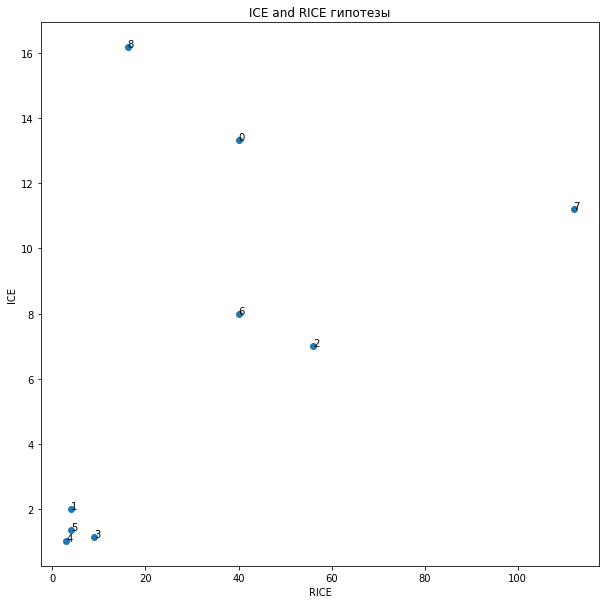

In [211]:
y = hypothesis['ICE'] 
z = hypothesis['RICE'] 
n = hypothesis.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE")

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()    

# Часть 2.Анализ A/B-теста.


## График кумулятивной выручки по группам. 


In [212]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()


In [213]:
#Соберём агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group']
                                   )]\
.agg({'date' : 'max', 'group' : 'max'
      , 'transactionid' : 'nunique'
      , 'visitorid' : 'nunique'
      , 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])



In [214]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max'
          , 'visitors' : 'sum'})
    , axis=1).sort_values(by=['date','group'])


In [215]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))


         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845


In [216]:
# проверим даты cumulativeData с исходными 
print ('Минимальная дата',cumulativeData['date'].min())
print ('Максимальная дата',cumulativeData['date'].max())

Минимальная дата 2019-08-01
Максимальная дата 2019-08-31


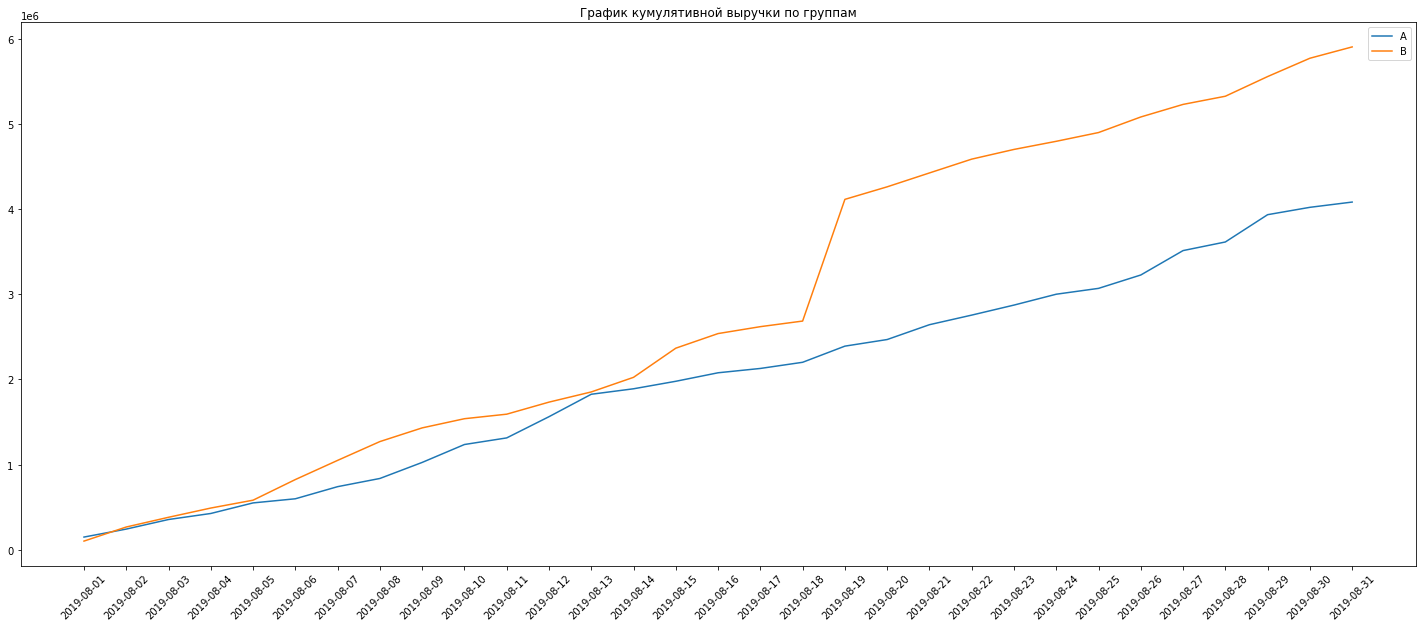

In [217]:


# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(25, 10))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.xticks(rotation=45)
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title("График кумулятивной выручки по группам")
plt.legend()
plt.show()

*Промежуточный вывод*

Графики растут на всём протяжении анализа почти равномерно. График группы А близок к линейному и показывает равномерный рост на всём протяжении. График группы В имеет резкий скачок выручки с 18 по 19 августа . Может быть крупный заказ или увеличение спроса. Необходим дополнительный анализ выбросов.

## График кумулятивного среднего чека по группам.
 

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

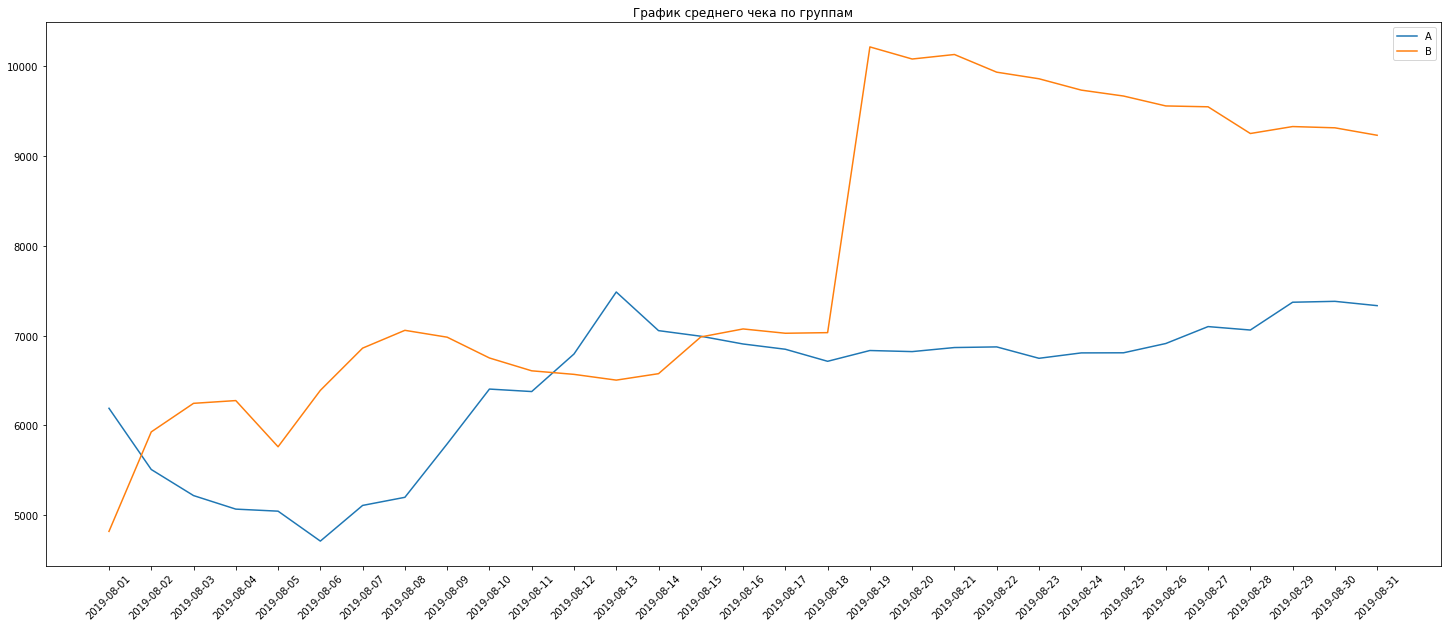

In [218]:
# Построим график кумулятивного среднего чека по группам
plt.figure(figsize=(25, 10))
plt.xticks(rotation=45)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title("График среднего чека по группам")
plt.legend()
plt.show()

*Промежуточный вывод*

Вначале периода оба графика ведут себя нестабильно имеют резкие спады и подъёмы. 19-20 августа график В имеет резкий подъём и далее начинает плавно спадать, т.к. резкий ему нужно больше данных, чтобы стабилизироваться и приблизится к реальному среднему чеку.График А ,напротив, почти не меняется после пика 13 августа. Оба графика к концу периода начали стабилизироватся в области настоящего среднего. Средний чек группы В выше, чем у группы А, возможно был крупный заказ и это выясним в ходе дальнейшего анализа.

## График относительного изменения кумулятивного среднего чека группы B к группе A. 
  

Построим график относительного различия для среднего чека. Добавим горизон-тальную ось методом axhline(). 

In [219]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB
                                                   , left_on='date'
                                                   , right_on='date'
                                                   , how='left'
                                                   , suffixes=['A', 'B'])

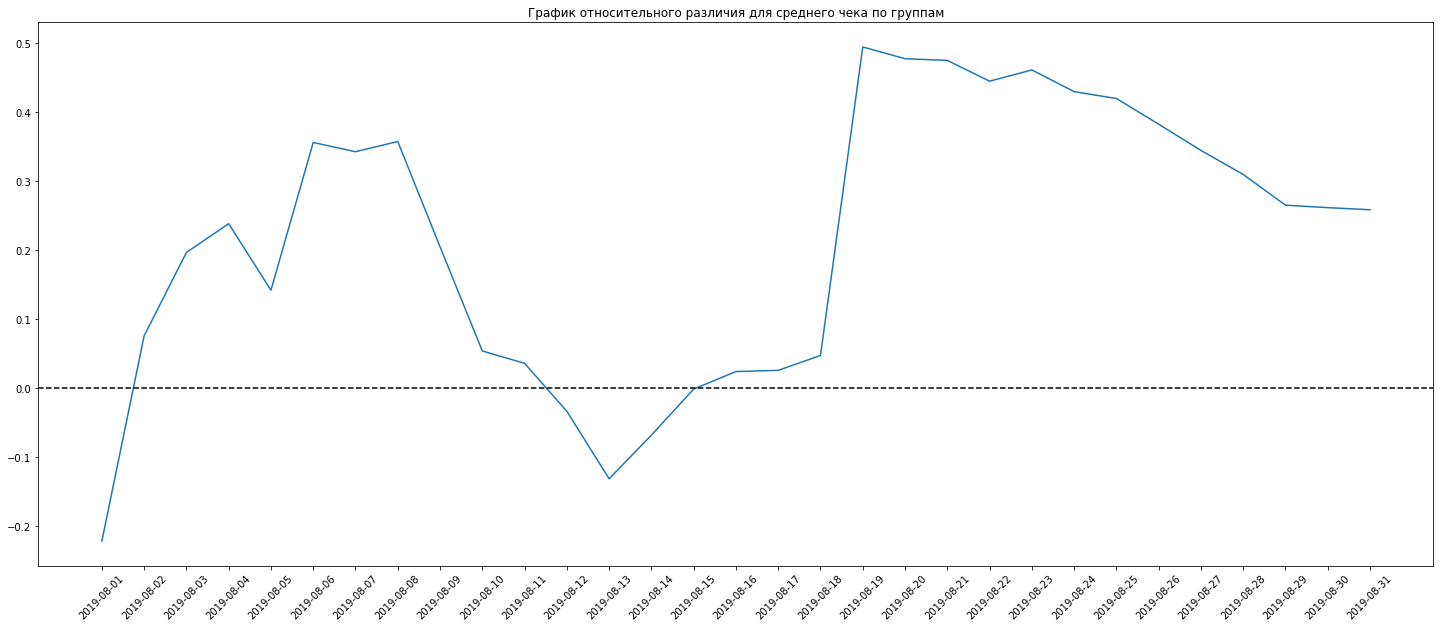

In [220]:
# Построим график относительного различия для среднего чека
plt.figure(figsize=(25, 10))
plt.xticks(rotation=45)
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (
    mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
    mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.title("График относительного различия для среднего чека по группам")
plt.show()

*Промежуточный вывод*

В нескольких точках график различия между сегментами резко «скачет».В середине августа наблюдаем резкий уход в минус и затем возвращение на прежний уровень . К Концу наблюдаемого периода наметилась стабилизация. Видимо всё же присутствуют крупные заказы и выбросы,которые найдём  позже.

##  График кумулятивной конверсии по группам. 


In [221]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


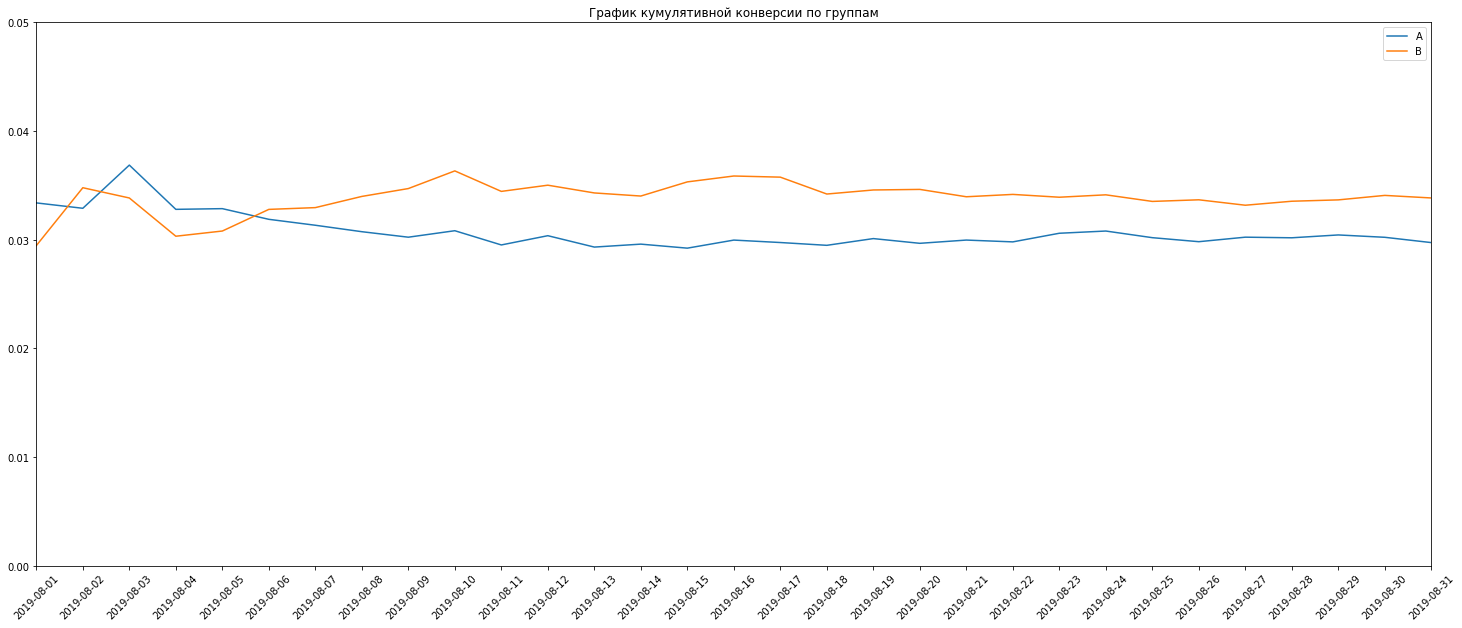

In [222]:
# строим графики
plt.figure(figsize=(25, 10))
plt.xticks(rotation=45)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0, 0.05])
#  подпись графика
plt.title("График кумулятивной конверсии по группам")
plt.show()

*Промежуточный вывод*

Вначале  графика заметны пики  конверсии в обеих группах, но конверсия группы А опережала группу В. Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

## График относительного изменения кумулятивной конверсии группы B к группе A.


In [223]:
# Построим график относительного различия кумулятивных конверсий:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']]
    , left_on='date'
    , right_on='date'
    , how='left'
    , suffixes=['A', 'B'])

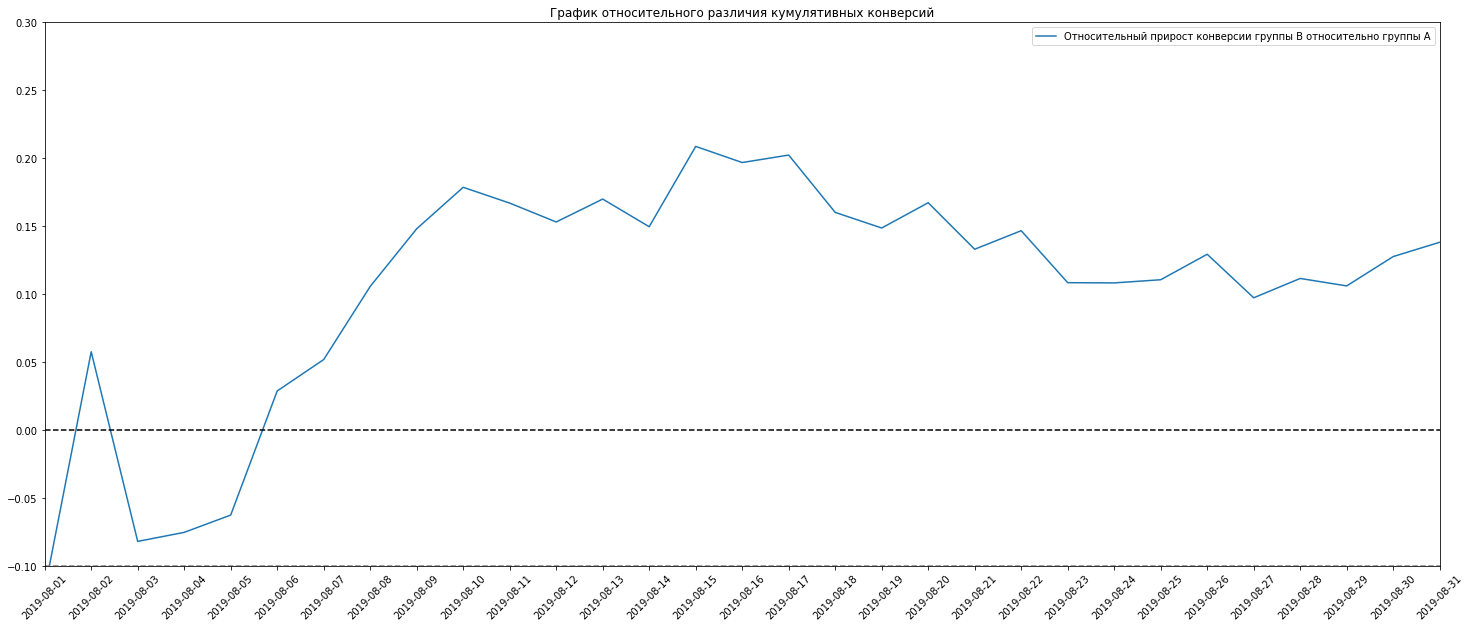

In [224]:
plt.figure(figsize=(25, 10))
plt.xticks(rotation=45)
plt.plot(mergedCumulativeConversions['date']
         , mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
         , label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.1, 0.3])
plt.title("График относительного различия кумулятивных конверсий")
plt.show()

*Промежуточный вывод*

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд. Потом её конверсия снова падала, но снова вырвалась вперёд и затем стабилизировалась и теперь постепенно растёт.
Стоит проанализировать аномалии, возможно, они изменят картину. 


## Точечный график количества заказов по пользователям. 


In [225]:
# Подсчитаем количество заказов по пользователям и посмотрим на результат:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)

ordersByUsers.columns = ['visitors', 'transactions']
# выведем на экран результат первые 10 строк
print(ordersByUsers.sort_values(by='transactions', ascending=False).head(10))


        visitors  transactions
1023  4256040402            11
591   2458001652            11
569   2378935119             9
487   2038680547             8
44     199603092             5
744   3062433592             5
55     237748145             5
917   3803269165             5
299   1230306981             5
897   3717692402             5


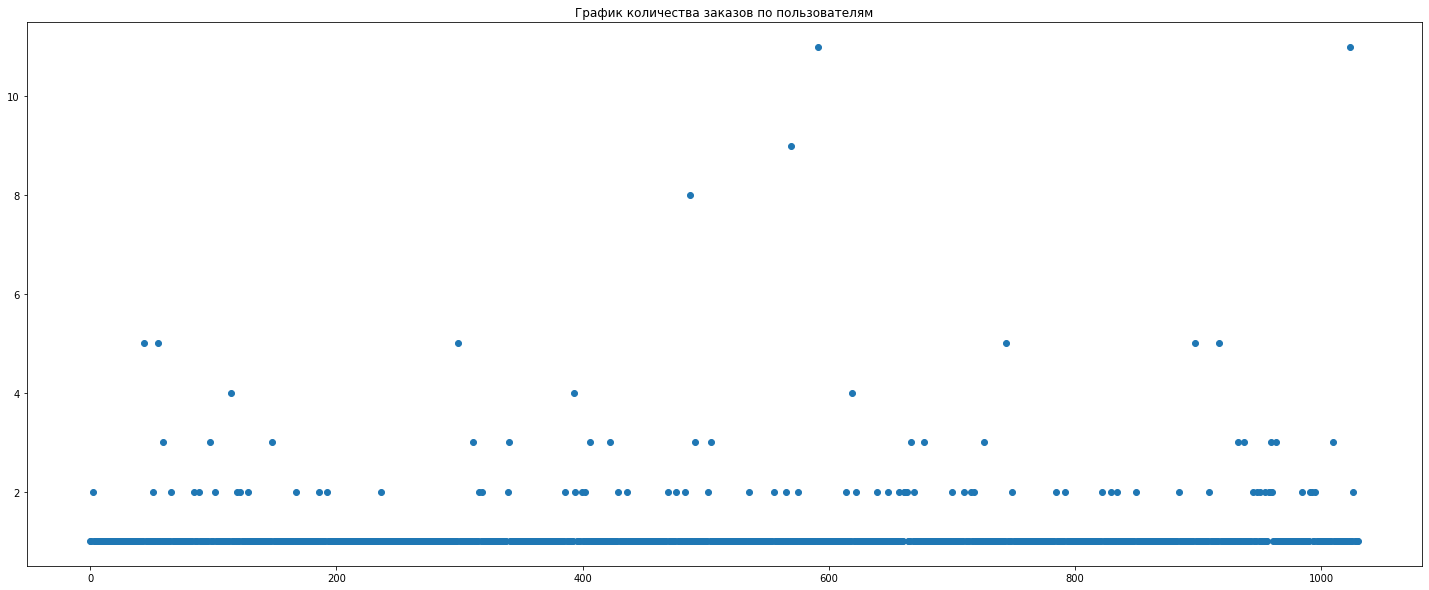

In [226]:
# построим График количества заказов по пользователям
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(25, 10))
plt.scatter(x_values, ordersByUsers['transactions'])
plt.title("График количества заказов по пользователям")
plt.show()

*Промежуточный вывод*

Очень много пользователей с 1 заказом, меньше - с двумя, а 3-4 и более заказов уже редкость. Их точная доля не ясна — непонятно, считать их аномалиями или нет.
Посчитаем выборочные перцентили количества заказов на одного пользователя.

## Расчет 95-й и 99-й перцентили количества заказов на пользователя.


In [227]:
# Определим 90, 95 и 99 перцентили количества заказов
print(np.percentile(ordersByUsers['transactions'], [90, 95, 99]))

[1. 2. 4.]


*Промежуточный вывод*

Не более 5% пользователей оформляли больше чем 2 заказов, не более 1% пользователей заказали более 4 раз и 10% пользователей сделали более одного заказа.
Разумно выбрать 2 или 4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

## Точечный график стоимостей заказов.


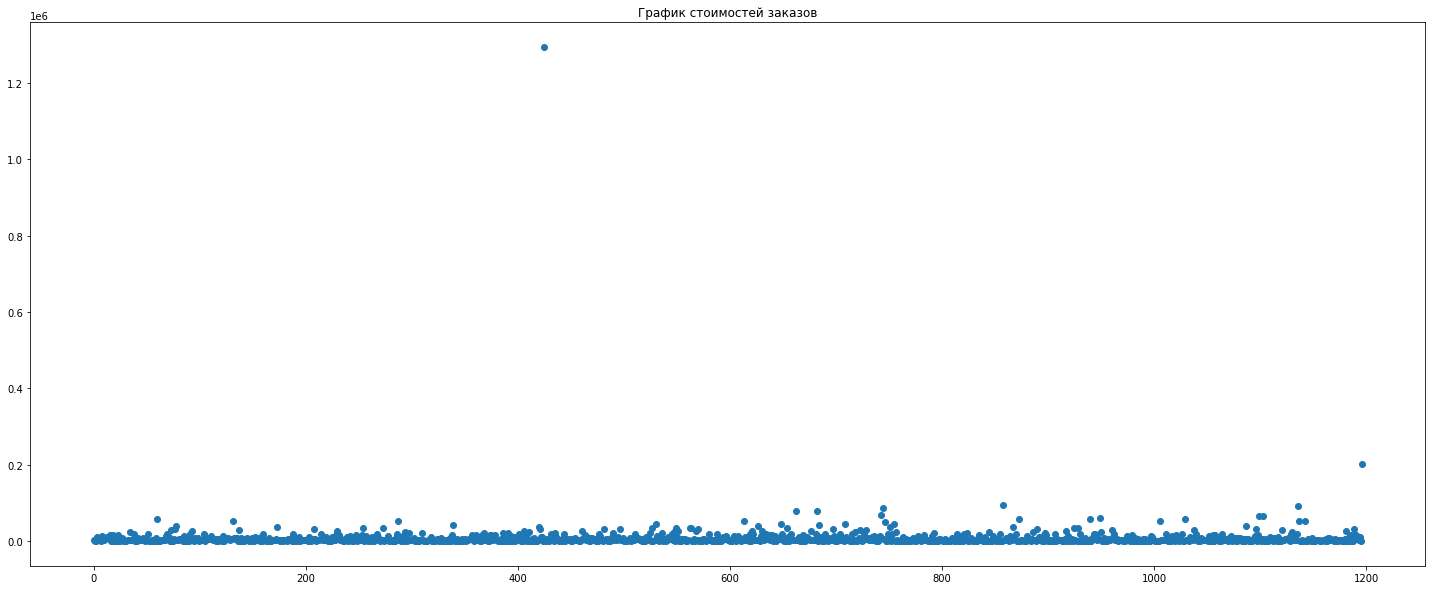

In [228]:
# построим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(25, 10))
plt.scatter(x_values, orders['revenue'])
plt.title("График стоимостей заказов")
plt.show()

*Промежуточный вывод*

Всё, как предполагали: есть один очень дорогой заказ и небольшое количество не очень дорогих. По графику можно выбрать границу аномальных заказов между 10000 и 30000, принято отсеивать от 1% до 5% наблюдений с крайними значениями. Далее найдём границы этих значений.

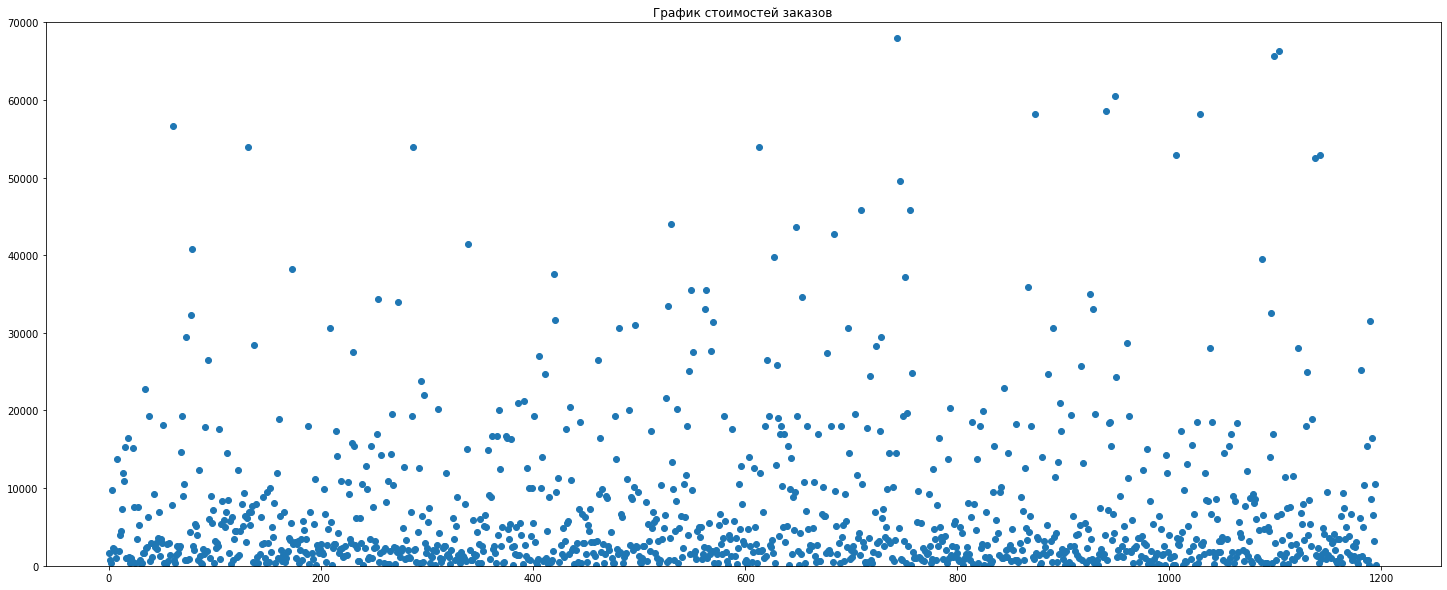

In [229]:
# построим точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(25, 10))
plt.scatter(x_values, orders['revenue'])
plt.title("График стоимостей заказов")
plt.ylim([0, 70000]) 
plt.show()

## Расчёт 95-й и 99-й перцентилей стоимости заказов.
Выбор границы для определения аномальных заказов.

In [231]:
# Определим 90, 95 и 99 перцентили среднего чека в выборке:


print(np.percentile(orders['revenue'], [90, 95, 99]))




[18168.  28000.  58233.2]


*Промежуточный вывод*

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей.

## Расчёт статистической значимости различий в конверсии между группами по «сырым» данным.


Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей. Примем критический уровень статистической значимости alpha = 0.05    

Сформулируем гипотезы.

Нулевая Н0: различий в конверсии между группами нет. 

Альтернативная Н1: различия в конверсии между группами есть.


In [232]:
# Подготовим данные группы А
visitorsAdaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsAdaily.columns = ['date', 'visitorsperdateA']

visitorsAcummulative = visitorsAdaily.apply(
    lambda x: visitorsAdaily[visitorsAdaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsperdateA': 'sum'}
    ),
    axis=1,
)
visitorsAcummulative.columns = ['date', 'visitorscummulativeA']


In [233]:
# Подготовим данные группы В
visitorsBdaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBdaily.columns = ['date', 'visitorsperdateB']

visitorsBcummulative = visitorsBdaily.apply(
    lambda x: visitorsBdaily[visitorsBdaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsperdateB': 'sum'}
    ),
    axis=1,
)
visitorsBcummulative.columns = ['date', 'visitorscummulativeB']


In [234]:
# создадим переменные для ежедневного и накопленного количества заказов  для группы А
ordersAdaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersAdaily.columns = ['date', 'ordersperdateA', 'revenueperdateA']

ordersAcummulative = ordersAdaily.apply(
    lambda x: ordersAdaily[ordersAdaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersperdateA': 'sum', 'revenueperdateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersAcummulative.columns = [
    'date',
    'orderscummulativeA',
    'revenuecummulativeA',
]


In [235]:
# создадим переменные для ежедневного и накопленного количества заказов  для группы В
ordersBdaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBdaily.columns = ['date', 'ordersperdateB', 'revenueperdateB']

ordersBcummulative = ordersBdaily.apply(
    lambda x: ordersBdaily[ordersBdaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersperdateB': 'sum', 'revenueperdateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBcummulative.columns = [
    'date',
    'orderscummulativeB',
    'revenuecummulativeB',
]


In [236]:
# сохраним в переменной data результат соединения полученных ранее переменных
data = (
    ordersAdaily.merge(
        ordersBdaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersAcummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBcummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsAdaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBdaily, left_on='date', right_on='date', how='left')
    .merge(visitorsAcummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBcummulative, left_on='date', right_on='date', how='left')
)
# выведем на экран первые 5 строк
display(data.head(5))


,date,ordersperdateA,revenueperdateA,ordersperdateB,revenueperdateB,orderscummulativeA,revenuecummulativeA,orderscummulativeB,revenuecummulativeB,visitorsperdateA,visitorsperdateB,visitorscummulativeA,visitorscummulativeB
0,2019-08-01,20,148579,20,101217,20,148579,20,101217,719,713,719,713
1,2019-08-02,19,93822,23,165531,39,242401,43,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,63,354874,59,380996,507,509,1845,1803
3,2019-08-04,15,70825,16,108571,78,425699,75,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,103,549917,98,581995,756,707,3318,3280


•	Посчитаем статистическую значимость различия в конверсии между группами.
•	Создадим переменные ordersbyusersA и ordersbyusersB со столбцами ['visitorid', 'transactionid']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.


In [237]:
# создадим переменную для группы А
ordersbyusersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersbyusersA.columns = ['visitorid', 'transactions']


In [238]:
# создадим переменную для группы В
ordersbyusersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersbyusersB.columns = ['visitorid', 'transactions']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соот-ветствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.
Переменная sampleA должна состоять из двух частей:
1.	Список с количеством заказов для каждого из пользовате-лей: ordersByUsersA['orders'].
2.	Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о зака-зах: data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders']). Создадим объект pd.Series нужной длины:

Применим критерий и отформатируем p-value , округлив его до трёх знаков после запятой.

Чтобы получить конверсию в группе, поделим сумму заказов на число пользовате-лей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём кон-версию группы B: SampleB.mean().
Выведем относительный прирост конверсии группы B: конверсия группы B / конвер-сия группы A - 1. Округлим до трёх знаков после запятой.



In [239]:
# переменные sampleA и sampleB

sampleA = pd.concat([ordersbyusersA['transactions']
                     ,pd.Series(0, index=np.arange(data['visitorsperdateA'].sum() 
                                                    - len(ordersbyusersA['transactions']))
                                                        , name='transactions')],axis=0)

sampleB = pd.concat([ordersbyusersB['transactions']
                     ,pd.Series(0, index=np.arange(data['visitorsperdateB'].sum() 
                                                   - len(ordersbyusersB['transactions']))
                                                        , name='transactions')],axis=0)


In [240]:
# Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой
print('p-value  составляет:',"{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('конверсия составляет:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))



p-value  составляет: 0.017
конверсия составляет: 0.138


*Промежуточный вывод*

По «сырым» данным различия в конверсии групп A и B есть.
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

Принимаем альтернативную гипотезу о том , что различия в конверсии между группами есть.

Относительный проигрыш группы А равен 13.8%.


## Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. 

 

Нулевая гипотеза Н0: различий в среднем чеке между группами нет.

Альтернативная гипотеза Н1: различия в среднем чеке между группами есть.


Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов.


In [241]:
#  выведем результат расчётов
print('p-value  составляет:','{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue']
                                       , orders[orders['group']=='B']['revenue'])[1]))
print('средний чек составляет:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].
                       mean()/orders[orders['group']=='A']['revenue'].mean()-1))


p-value  составляет: 0.729
средний чек составляет: 0.259


*Промежуточный вывод*

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу  нет. Впрочем, средний чек группы B значи-тельно выше среднего чека группы A.

## Расчёт статистической значимости различий в конверсии между группами по «очищенным» данным.



Вспомним, что  95-й и 99-й перцентили средних чеков равны 28000 и  58233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказам.
Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём  около 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 3 — userswithmanyorders и пользователей, совершив-ших заказы дороже 30 000 — userswithexpensiveorders. Объединим их в табли-це abnormalusers.
Узнаем, сколько всего аномальных пользователей методом shape().


In [242]:
# Сделаем срезы аномальных пользователей
userswithmanyorders = pd.concat(
    [
        ordersbyusersA[ordersbyusersA['transactions'] > np.percentile(ordersByUsers['transactions'], [95, 99])[0]]['visitorid'],
        ordersbyusersB[ordersbyusersB['transactions'] > np.percentile(ordersByUsers['transactions'], [95, 99])[0]]['visitorid'],
    ],
    axis=0,
)
userswithexpensiveorders = orders[orders['revenue'] > np.percentile(orders['revenue'], [95, 99])[0]]['visitorid']
abnormalusers = (
    pd.concat([userswithmanyorders, userswithexpensiveorders], axis=0)
    .drop_duplicates()
    .sort_values()
)
# выведем на экран первые 5 строк
print(abnormalusers.head(5))
# выведем на экран количество строк
print(abnormalusers.shape[0])


1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorid, dtype: int64
74


*Промежуточный вывод*

Всего 74 аномальных пользователей отсеятся по заданным условиям.


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.


In [243]:
# расчет по очищенным данным
sampleAfiltered = pd.concat(
    [
        ordersbyusersA[
            np.logical_not(ordersbyusersA['visitorid'].isin(abnormalusers))
        ]['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsperdateA'].sum() - len(ordersbyusersA['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)

sampleBfiltered = pd.concat(
    [
        ordersbyusersB[
            np.logical_not(ordersbyusersB['visitorid'].isin(abnormalusers))
        ]['transactions'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsperdateB'].sum() - len(ordersbyusersB['transactions'])
            ),
            name='transactions',
        ),
    ],
    axis=0,
)


In [244]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
print('P-value:','{0:.3f}'.format(st.mannwhitneyu(sampleAfiltered, sampleBfiltered)[1]))
print('Конверсии :','{0:.3f}'.format(sampleBfiltered.mean()/sampleAfiltered.mean()-1))


P-value: 0.013
Конверсии : 0.173


*Промежуточный вывод*

Результаты по конверсии изменились :0.017/0.138 было до очистки данных.

Принимаем альтернативную гипотезу о том , что различия в конверсии между группами есть.

Относительный проигрыш группы А равен 17.3%.


## Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 

In [245]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalusers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalusers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalusers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalusers)),
            )
        ]['revenue'].mean()
        - 1
    )
)


0.738
-0.020


*Промежуточный вывод*

Вспомним, что эти показатели по сырым данным были: 0.729/0.259

P-value увеличился, но и разница между сегментами заметно сократилась на 27,9 пунктов:с 25,9% до -2%. 
Аномально большые заказы больше не оказываеют влияния на  размер средней выручки группы В. Общие выводы по результатам теста не изменились.Примается нулевая гипотеза Н0: различий в среднем чеке между группами нет.


# Выводы и решение по результатам теста. 


В ходе выполнения задания были выполнены следующие этапы:

Знакомство и предобработка постапивших для анализа данных.

Приоритизация гипотез.
 
Анализ A/B-теста с применение средств визуализации и статистических методов.


В результате проведённого анализа установлены факты:



•	Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.;

•	По сырым данным есть статистически значимого различие по среднему чеку между группами. Однако после удаления аномалий статистически значимое различие соекратилось с 25,9% до -2%.;

•	График различия конверсии и расчёты статистической значимости различий между группами сообщают, что результаты группы B лучше результатов в группе A и эта тенденция сохраняется.

Исходя из обнаруженных фактов, тест следует :

 **Остановить тест и зафиксировать победу группы В.**
 
 
